#Sentiment Analysis
Sentiment analysis is the name given to the process of classifying pieces of information (words, phrases, texts) into positive, negative and neutral.
It is possible for the classification to also contain extra information regarding how intense this sentiment is (e.g. not just positive/negative, but very positive, positive, negative, very negative) as well as nuanced emotions.

### Sentiment Lexicons
The most commonly used method for sentiment analysis that requires no prior data of the text (no labels for machine learning) is the lexicon method.

Lexicons are dictionaries that contain a collection of words and their corresponding sentiment value (for example ‘happy’ - positive, ‘sad’ - negative).
These lexicons are used for measuring the overall sentiment of a text by usually naively adding up all of these sentiment values. 


# Afinn
Afinn is one such lexicon that supports several languages (also works with emoticons)
https://github.com/fnielsen/afinn

In [2]:
%pip install afinn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from matplotlib import pyplot as plt
from afinn import Afinn
afinn = Afinn()
print(afinn.score('thankful'))
print(afinn.score('I am thankful'))

2.0
2.0


In [5]:
print(afinn.score('not thankful')) # Quite naive - score of ‘thankful’ and score of ‘not thankful’ are the same (positive 2)

2.0


In [6]:
print(afinn.score('no thankful')) # (sum of 1 negative word and 1 positive word)
print(afinn.score('sad sad thankful')) # (sum of 2 negative words and 1 positive word)

1.0
-2.0


In [7]:
print(afinn.score('I am happy because it is sunny and warm'))
print(afinn.score("No, sorry, I can't do it because I'm too stressed"))

4.0
-4.0


In [8]:
afinn._dict #Taking a look at what’s under the hood

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimo

In [9]:
print(len(afinn._dict)) # If we check the length of the dictionary, we can see that we have 3382 entries for positive/negative words

3382


# Apply sentiment analysis to a book

In [10]:
%pip install gutenbergpy tidytext

Note: you may need to restart the kernel to use updated packages.


In [11]:
# We will try to apply sentiment analysis on Jane Austen’s book from last laboratory - Sense and Sensibility
import pandas as pd
import gutenbergpy.textget
from tidytext import unnest_tokens
import nltk
nltk.download('punkt')


def line_is_chapter(dataframe):
    chapter_list = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search("^chapter [\\divxlc]*\.$", row['content'], re.IGNORECASE):
            curr_chapter += 1
        chapter_list.append(curr_chapter)
    return chapter_list



raw_book = gutenbergpy.textget.get_text_by_id(161)
sense_sensibility_text = gutenbergpy.textget.strip_headers(raw_book).decode("utf-8")
print(len(sense_sensibility_text)) # Length of our data

# Create our dataframe
import re
sense_sensibility_lines = sense_sensibility_text.splitlines()

sense_sensibility_df = pd.DataFrame({
    "content": sense_sensibility_lines,
    "line": list(range(len(sense_sensibility_lines)))
})

# The package provided us with data in a byte object format. Since we prefer working with strings, let's convert all content into utf-8 strings.
ss_df = sense_sensibility_df.copy()

curr_chapter = 0
sense_sensibility_df = sense_sensibility_df.assign(chapter = line_is_chapter(ss_df))
ss_df = ss_df.assign(chapter = line_is_chapter(ss_df)) # Split into chapters

ss_df = (unnest_tokens(ss_df, "word", "content"))
ss_df.reset_index(drop=True, inplace=True)
ss_df = ss_df[ss_df.word.notnull()].reset_index(drop=True)
ss_df


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bogda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


683356


,line,chapter,word
0,1,0,illustration
1,6,0,sense
2,6,0,and
3,6,0,sensibility
4,8,0,by
...,...,...,...
123821,12671,50,between
123822,12671,50,their
123823,12671,50,husbands
123824,12673,50,the


In [12]:
print(afinn.score(sense_sensibility_text)) # Let’s see the overall sentiment of the book given by Afinn


3928.0


### Exercise 1 
Find the afinn sentiment score for chapters 10, 30 and 50 of Jane Austen.
(print 3 separate values, 1 for each chapter)

In [21]:
# Write code below
chapter_10_words = ' '.join(ss_df[ss_df.chapter == 10]['word'].to_list())
chapter_30_words = ' '.join(ss_df[ss_df.chapter == 30]['word'].to_list())
chapter_50_words = ' '.join(ss_df[ss_df.chapter == 50]['word'].to_list())

print(afinn.score(chapter_10_words))
print(afinn.score(chapter_30_words))
print(afinn.score(chapter_50_words))

156.0
63.0
154.0


In [22]:
# Let's add all the word scores as information in the dataframe
word_scores = [afinn.score(word) for word in ss_df['word']]
word_scores

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [23]:
ss_df = ss_df.assign(word_score = word_scores)
ss_df

,line,chapter,word,word_score
0,1,0,illustration,0.0
1,6,0,sense,0.0
2,6,0,and,0.0
3,6,0,sensibility,0.0
4,8,0,by,0.0
...,...,...,...,...
123821,12671,50,between,0.0
123822,12671,50,their,0.0
123823,12671,50,husbands,0.0
123824,12673,50,the,0.0


In [24]:
%pip install siuba plotnine

Note: you may need to restart the kernel to use updated packages.


In [25]:
from siuba import * # Add this in each cell where you are using a siuba function
grouped_ss_df = group_by(ss_df, 'chapter') # Let's group the dataframe by chapter (which we kind of already have by the way we constructed our dataframe)
grouped_ss_df


,line,chapter,word,word_score
0,1,0,illustration,0.0
1,6,0,sense,0.0
2,6,0,and,0.0
3,6,0,sensibility,0.0
4,8,0,by,0.0
...,...,...,...,...
123821,12671,50,between,0.0
123822,12671,50,their,0.0
123823,12671,50,husbands,0.0
123824,12673,50,the,0.0


In [26]:
from siuba import *
summarized_ss_df = summarize(grouped_ss_df, chapter_score = _.word_score.sum()) # summarize the sentiment scores in each chapter
summarized_ss_df

,chapter,chapter_score
0,0,0.0
1,1,99.0
2,2,91.0
3,3,154.0
4,4,137.0
5,5,30.0
6,6,89.0
7,7,110.0
8,8,24.0
9,9,78.0


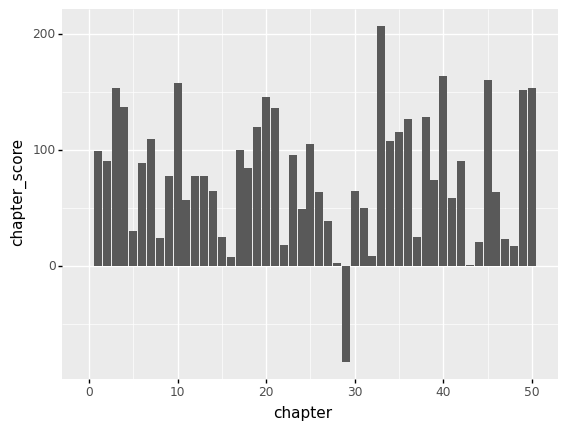

<ggplot: (95429414494)>

In [27]:
from plotnine import *

# We meet the "piping" format of writing code for the first time, ggplot likes to use this format for ease of writing
(ggplot(summarized_ss_df)         # defining what data to use
 + aes(x='chapter', y='chapter_score')    # defining what variables to use
 + geom_bar(stat='identity') # defining the type of plot to use
)


### Exercise 2
1. **Create 2 new dataframes called summarized_ss_df_pos and summarized_ss_df_neg**.

- summarized_ss_df_pos will contain the summarized chapter scores after **keeping only the positive words** (word_score => 0) from the initial dataframe.

- summarized_ss_df_neg will contain the summarized chapter scores after **keeping only the negative words** (word_score <= 0) from the initial dataframe.

    *chapter 1 for summarized_ss_df_pos should have 166 score, chapter 1 for summarized_ss_df_neg should have -67 score.*

2. **Plot the scores per chapter** (separately for each of the 2 dfs) of the new dataframes using ggplot.

In [35]:
summarized_ss_df_pos = ss_df[ss_df.word_score > 0]
summarized_ss_df_pos = group_by(summarized_ss_df_pos, 'chapter')
summarized_ss_df_pos = summarize(summarized_ss_df_pos, chapter_score = _.word_score.sum())

summarized_ss_df_pos.head(n=30)

,chapter,chapter_score
0,1,166.0
1,2,158.0
2,3,214.0
3,4,226.0
4,5,68.0
5,6,121.0
6,7,144.0
7,8,100.0
8,9,158.0
9,10,249.0


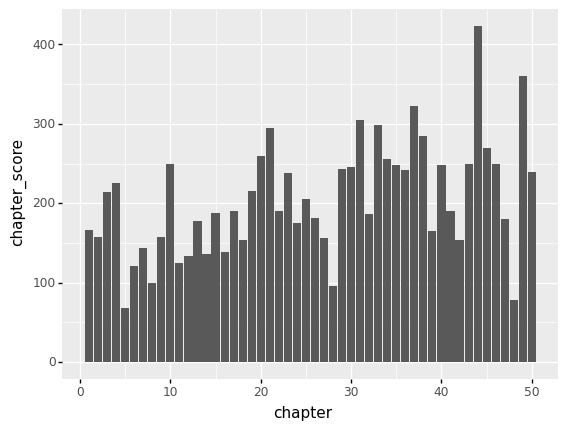

<ggplot: (95452926356)>

In [46]:
(ggplot(summarized_ss_df_pos)         # defining what data to use
 + aes(x='chapter', y='chapter_score')    # defining what variables to use
 + geom_bar(stat='identity') # defining the type of plot to use
)

In [36]:
summarized_ss_df_neg = ss_df[ss_df.word_score < 0]
summarized_ss_df_neg = group_by(summarized_ss_df_neg, 'chapter')
summarized_ss_df_neg = summarize(summarized_ss_df_neg, chapter_score = _.word_score.sum())

summarized_ss_df_neg.head(n=30)

,chapter,chapter_score
0,1,-67.0
1,2,-67.0
2,3,-60.0
3,4,-89.0
4,5,-38.0
5,6,-32.0
6,7,-34.0
7,8,-76.0
8,9,-80.0
9,10,-91.0


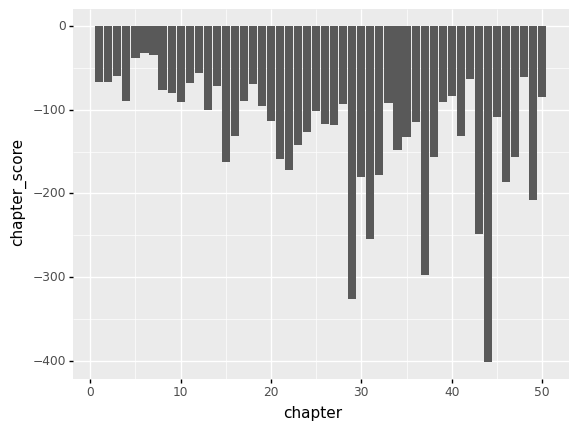

<ggplot: (95452365023)>

In [47]:
(ggplot(summarized_ss_df_neg)         # defining what data to use
 + aes(x='chapter', y='chapter_score')    # defining what variables to use
 + geom_bar(stat='identity') # defining the type of plot to use
)

# NRC
Nrc is another lexicon that contains somewhat different sentiment information. It categorizes each word into one or multiple of the following categories: anticipation, positive, trust, joy, surprise, negative, sadness, anger, disgust, fear

In [37]:
%pip install NRCLex

  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=d5d5fbf0102217bb6b20a0e0eac5da7e5751916486702425cf639e2b78f4fda3
  Stored in directory: c:\users\bogda\appdata\local\pip\cache\wheels\68\c4\f2\c390dd3eac398fdf45f7a01c6516bc53fa7a9ab59c7d2ff518
Successfully built NRCLex
Note: you may need to restart the kernel to use updated packages.


In [38]:
# Applying it to Sense & Sensibility
from nrclex import NRCLex
text_object = NRCLex(sense_sensibility_text)
text_object.lexicon # Let's see what the words look like under the lexicon hood

{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

In [39]:
text_object.top_emotions # returns the strongest emotion(s)

[('positive', 0.24099464686582628)]

In [40]:
text_object.raw_emotion_scores # Word count per emotion

{'anticipation': 3613,
 'positive': 6978,
 'trust': 3823,
 'joy': 3294,
 'surprise': 1523,
 'negative': 3737,
 'sadness': 2004,
 'anger': 1272,
 'disgust': 937,
 'fear': 1774}

In [41]:
text_object.affect_frequencies # Frequency of each emotion

{'fear': 0.06126748402693835,
 'anger': 0.04393023657399413,
 'anticip': 0.0,
 'trust': 0.1320324641685374,
 'surprise': 0.05259886030046624,
 'positive': 0.24099464686582628,
 'negative': 0.12906233811086168,
 'sadness': 0.06921084441374546,
 'disgust': 0.032360559488862024,
 'joy': 0.11376273527888102,
 'anticipation': 0.12477983077188741}

In [42]:
# We’ll add a new column with the top sentiment detected by NRC (part 1)
list_sentiments = [NRCLex(elem).top_emotions for elem in ss_df['word']]
print(list_sentiments[100])

list_first_sentiment = [elem[0] for elem in list_sentiments]
print(list_first_sentiment[100])


[('fear', 0.0), ('anger', 0.0), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.0), ('positive', 0.0), ('negative', 0.0), ('sadness', 0.0), ('disgust', 0.0), ('joy', 0.0)]
('fear', 0.0)


In [43]:
# We’ll add a new column with the top sentiment detected by NRC (part 2)
ss_df_v2 = ss_df.copy()
ss_df_v2 = ss_df_v2.assign(sentiment = list_first_sentiment)

ss_df_v2[ss_df_v2.apply(lambda x: x['sentiment'][1] > 0, axis=1)] # filter all the entries for which the value is greater than 0
ss_df_v2

,line,chapter,word,word_score,sentiment
0,1,0,illustration,0.0,"(fear, 0.0)"
1,6,0,sense,0.0,"(positive, 1.0)"
2,6,0,and,0.0,"(fear, 0.0)"
3,6,0,sensibility,0.0,"(positive, 1.0)"
4,8,0,by,0.0,"(fear, 0.0)"
...,...,...,...,...,...
123821,12671,50,between,0.0,"(fear, 0.0)"
123822,12671,50,their,0.0,"(fear, 0.0)"
123823,12671,50,husbands,0.0,"(fear, 0.0)"
123824,12673,50,the,0.0,"(fear, 0.0)"


In [44]:
# Let’s bring together the text per chapters
test_per_chapter = ss_df.groupby('chapter').agg({'line':'first', # show first line from chapter
                             'word': ', '.join, # join all words from chapter
                             'word_score':'sum' }).reset_index() # get sum of all word_scores per chapter
test_per_chapter






,chapter,line,word,word_score
0,0,1,"illustration, sense, and, sensibility, by, jan...",0.0
1,1,69,"chapter, i, the, family, of, dashwood, had, lo...",99.0
2,2,223,"chapter, ii, mrs, john, dashwood, now, install...",91.0
3,3,427,"chapter, iii, mrs, dashwood, remained, at, nor...",154.0
4,4,592,"chapter, iv, “, what, a, pity, it, is, elinor,...",137.0
5,5,788,"chapter, v, no, sooner, was, her, answer, disp...",30.0
6,6,890,"chapter, vi, the, first, part, of, their, jour...",89.0
7,7,1019,"chapter, vii, barton, park, was, about, half, ...",110.0
8,8,1146,"chapter, viii, mrs, jennings, was, a, widow, w...",24.0
9,9,1279,"chapter, ix, the, dashwoods, were, now, settle...",78.0


Text(0, 0.5, 'Fear occurrences')

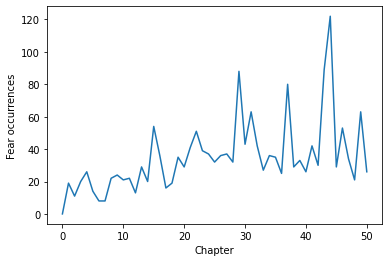

In [45]:
# Instead of adding any other information, let’s just do some simple visualizations
# Take all the occurrences of fear per chapter and plot them
# We'll use pyplot (plt) from matplotlib for this visualization to expand our visualizers toolbox

my_fear_list = [NRCLex(elem).raw_emotion_scores['fear'] if 'fear' in NRCLex(elem).raw_emotion_scores else 0 for elem in test_per_chapter['word']]
plt.plot(my_fear_list)
plt.xlabel('Chapter')
plt.ylabel('Fear occurrences')

### Exercise 3
Plot the graphs with the evolution of 4 sentiments of your choice (except fear) throughout the chapters of the book. Plot 1 graph for each of these 4 sentiments.

Inspect the graphs, compare them to one another and to the ones from afinn and see if you find any similarities or interesting observations. (e.g. a chapter with high anticipation seems to be followed by a chapter with high joy - example of a random observation).


Text(0, 0.5, 'Disgust occurrences')

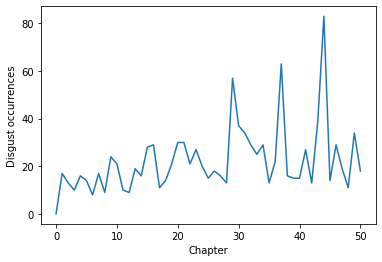

In [48]:
my_fear_list = [NRCLex(elem).raw_emotion_scores['disgust'] if 'disgust' in NRCLex(elem).raw_emotion_scores else 0 for elem in test_per_chapter['word']]
plt.plot(my_fear_list)
plt.xlabel('Chapter')
plt.ylabel('Disgust occurrences')

Text(0, 0.5, 'Joy occurrences')

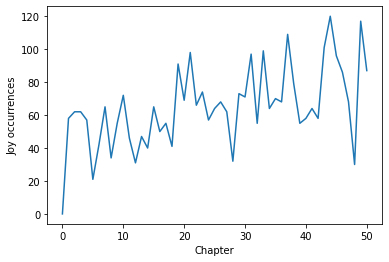

In [49]:
my_fear_list = [NRCLex(elem).raw_emotion_scores['joy'] if 'joy' in NRCLex(elem).raw_emotion_scores else 0 for elem in test_per_chapter['word']]
plt.plot(my_fear_list)
plt.xlabel('Chapter')
plt.ylabel('Joy occurrences')

Text(0, 0.5, 'Anticipation occurrences')

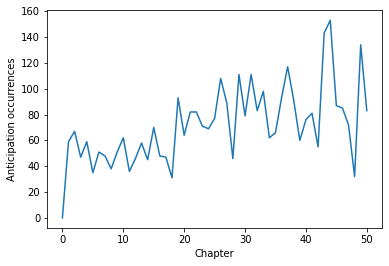

In [50]:
my_fear_list = [NRCLex(elem).raw_emotion_scores['anticipation'] if 'anticipation' in NRCLex(elem).raw_emotion_scores else 0 for elem in test_per_chapter['word']]
plt.plot(my_fear_list)
plt.xlabel('Chapter')
plt.ylabel('Anticipation occurrences')

Text(0, 0.5, 'Surprise occurrences')

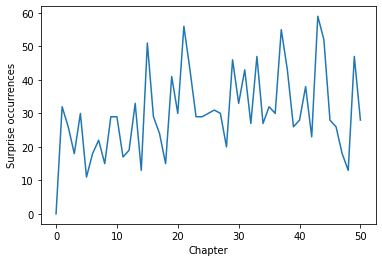

In [51]:
my_fear_list = [NRCLex(elem).raw_emotion_scores['surprise'] if 'surprise' in NRCLex(elem).raw_emotion_scores else 0 for elem in test_per_chapter['word']]
plt.plot(my_fear_list)
plt.xlabel('Chapter')
plt.ylabel('Surprise occurrences')

# NLTK Vader
Valence Aware Dictionary for sEntiment Reasoning (aka Vader) blended a lexicon approach with some basic grammatical rules and syntactical conventions in order to express sentiment polarity and intensity.

It is currently also part of the nltk NLP package

In [52]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores('Yay')
scores


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bogda\AppData\Roaming\nltk_data...


{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}

In [53]:
# Compound usually paints the best picture of the overall sentiment of the text. It is obtained from combining negative, neutral and positive values.
# We will split the words into positive, neutral and negative based on the compound value

list_nltk_sentiments = ['positive' if sia.polarity_scores(word)['compound'] > 0 else 'negative' if sia.polarity_scores(word)['compound'] < 0 else 'neutral' for word in ss_df['word']]

In [59]:
# Add the information to our dataframe
ss_df = ss_df.assign(nltk_sentiment = list_nltk_sentiments)
ss_df.head(500)[450:]


,line,chapter,word,word_score,nltk_sentiment
450,101,1,fortune,2.0,neutral
451,101,1,was,0.0,neutral
452,101,1,also,0.0,neutral
453,101,1,secured,2.0,positive
454,101,1,to,0.0,neutral
455,101,1,her,0.0,neutral
456,102,1,child,0.0,neutral
457,102,1,and,0.0,neutral
458,102,1,he,0.0,neutral
459,102,1,had,0.0,neutral


In [60]:
# Now let’s try to do a similar analysis to the one we did with Afinn
# First we get rid of the neutral values and then count the positive and negative values per chapter

from siuba import *
test_df = count(filter(ss_df, _.nltk_sentiment != 'neutral'), 'chapter', 'nltk_sentiment')
test_df


,chapter,nltk_sentiment,n
0,1,negative,41
1,1,positive,100
2,2,negative,49
3,2,positive,106
4,3,negative,40
...,...,...,...
95,48,positive,52
96,49,negative,118
97,49,positive,235
98,50,negative,54


In [56]:
# Multiply by -1 the count values for the negative sentiments so as to be able to sum up the 2 sentiments
test_df.loc[test_df['nltk_sentiment'] == 'negative', 'n'] *= -1
test_df


,chapter,nltk_sentiment,n
0,1,negative,-41
1,1,positive,100
2,2,negative,-49
3,2,positive,106
4,3,negative,-40
...,...,...,...
95,48,positive,52
96,49,negative,-118
97,49,positive,235
98,50,negative,-54


In [57]:
# Time to group the values by chapter and get the sum of each 2 values (positive and negative)

test_df_sentiment = test_df.groupby(test_df.chapter).sum().reset_index()
test_df_sentiment


,chapter,n
0,1,59
1,2,57
2,3,73
3,4,72
4,5,22
5,6,63
6,7,83
7,8,19
8,9,71
9,10,96


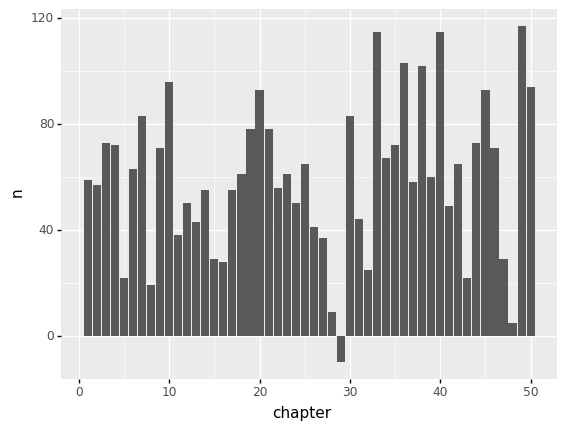

<ggplot: (95452364951)>

In [58]:
(ggplot(test_df_sentiment)         # defining what data to use
 + aes(x='chapter', y='n')    # defining what variable to use
 + geom_bar(stat='identity') # defining the type of plot to use
)


### Exercise 4
1. **Find the 10 words that contribute positively the most to the overall book sentiment and the 10 words that contribute negatively the most to the overall book sentiment.**

2. **Visualize these words and their contributions with the help of graphs. 
Create a plot for top 10 positive words and another one for top 10 negative words. You can use any plotting package that you want.**

Make use of **nltk_sentiment** (positive and negative) and **the number of occurrences** of the word. 

The word that contributes positively the most will be the word that appears most often in the book and has nltk_sentiment = positive.
The word that contributes negatively the most will be the word that appears most often in the book and has nltk_sentiment = negative.



In [35]:
# Write your code below

# Word Clouds

Word clouds are a beautiful, fun and useful way of representing and viewing text data. We’ve probably all seen one before. The basic concept is that of showing the most frequently appearing words in a piece of text and to scale these words proportionally to their frequency of appearance (e.g. a word appearing 500 times will have a higher font size and will be more obvious in the word cloud than a word appearing 100 times).

In [36]:
%pip install wordcloud

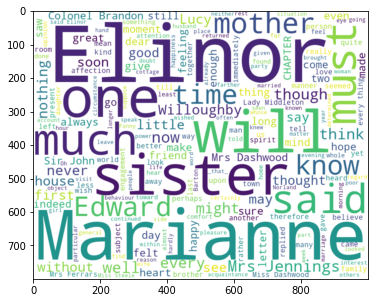

In [37]:
# Let’s create a word cloud from our Sense & Sensibility book
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color='white', width=1000, height=800).generate(sense_sensibility_text)
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


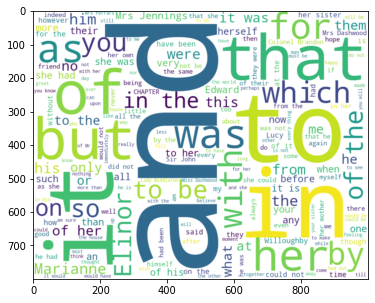

In [38]:
# WordCloud objects can take custom lists of stop words as input. They make use of a default stopwords list if you don't specify any though.
# If we were to create the same word cloud as before and give an empty stop words list we'd be reminded why we want to get rid of these words.

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color='white', width=1000, height=800, stopwords=[]).generate(sense_sensibility_text)
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [39]:
# We can also save our word clouds to file
wordcloud.to_file("saved_wcloud.png")


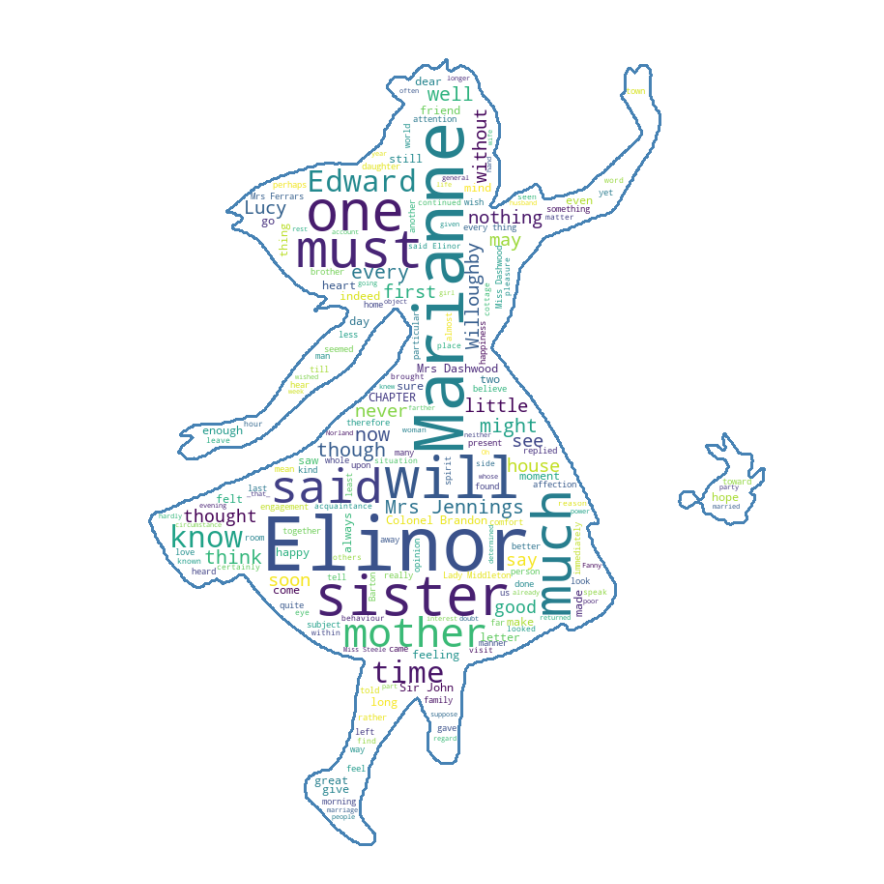

In [41]:
# We have the posibility of shaping the word cloud based on an image
import numpy as np
from PIL import Image
image_mask = np.array(Image.open("image_mask.png"))
wordcloud = WordCloud(background_color='white', mask=image_mask, width=2000, height=1800, contour_width=3, contour_color='steelblue').generate(sense_sensibility_text)
plt.figure(figsize = (16, 16), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


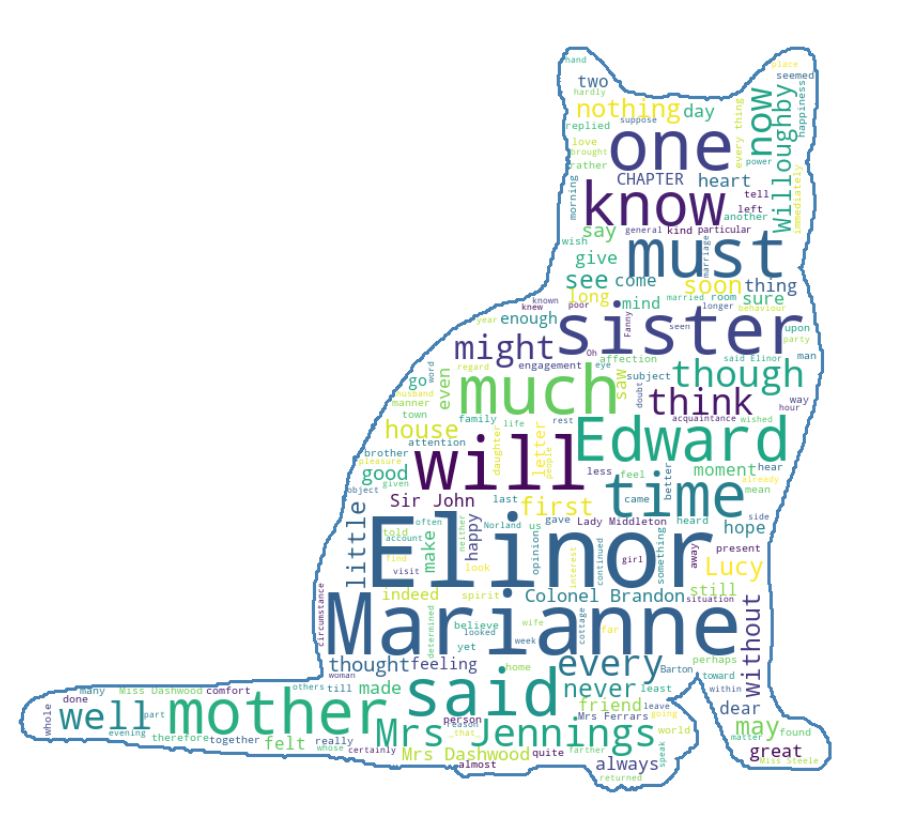

In [42]:
# We have to specify a transparent .png image to serve as a mask in order to get our shapes.
# The png image needs to have pixel values = 255 rather than 0 in order to work.

# Here's an example of how to do that
mask = np.array(Image.open("cat.png"))
mask[mask == 0] = 255

import numpy as np
from PIL import Image
wordcloud = WordCloud(background_color='white', mask=mask, width=1000, height=900, contour_width=3, contour_color='steelblue').generate(sense_sensibility_text)
plt.figure(figsize = (16, 16), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Exercise 5
1. Create a word cloud from **all the positive words** in Sense and Sensibility. 

    Use colormap='Set2' to color this word cloud.
2. Create a word cloud from **all the negative words** in Sense and Sensibility.

Observations

*   Make use of the sentiment given by nltk
*   Use a custom image mask (or two, one for each) that's different from the 2 masks given in the lab.
*   Give colormap='Set2' as a parameter to WordCloud() when generating the positive word cloud 

Suggestions

*   World clouds also have a generate_from_frequencies() method of generating the cloud. This expects a dictionary of form {'word_a' : 20, 'word_b' : 3, 'word_c' : 120, etc.} as input where words _a, _b and _c are the words and 20, 3, 120 are their respective occurrence frequency.
*   Dataframes can be transformed into dictionaries - e.g. .to_dict()



In [ ]:
# Write your code below


# Pretrained models (extra information)
*Machine Learning trained models are out of the scope of lab 3. This is purely informative. However, you can make use of any of these models in your exam project if you want better classifications.*

Machine Learning models - models that were trained on large datasets in order to predict something about the text data (e.g. whether a text is positive/negative) outclass their lexicon predecessors.

Models are usually trained on datasets with a well defined scope (such as movie reviews for instance). They may not be able to generalize properly for all types of text data, but they perform extremely well in the tasks they've been trained on.

If you use a model trained for movie review positivity prediction to try and classify positivity/negativity of an old book, you're likely going to have poor results. 
If you use the same model for other movie/book/hotel reviews, the model will most likely perform very well.


In [ ]:
!pip install -q transformers
# Get our sentiment analysis model from pipeline
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[{'label': 'NEGATIVE', 'score': 0.9990523457527161},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079},
 {'label': 'NEGATIVE', 'score': 0.9960491061210632}]

In [ ]:
# Apply it to some of our text data
data = ["I do not love you", "I hate you", "It's been a rough situation", "It went terribly well"]
sentiment_pipeline(data) 
# We can see that the model is not naive at all
# We can combine positive and negative words without confusing it

[{'label': 'NEGATIVE', 'score': 0.9990523457527161},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079},
 {'label': 'NEGATIVE', 'score': 0.9960491061210632},
 {'label': 'POSITIVE', 'score': 0.9997710585594177}]

You can visit https://huggingface.co/docs/transformers/main_classes/pipelines for plenty of other models.